## 

1Questão) Calcule o valor efetivo do sinal dado para janelas de tempo de 1s, 5s e 15s, gerando um gráfico
do mesmo para cada situação.


2Questão) Calcule o valor médio do sinal dado para janelas de tempo de 1s, 5s e 15s, gerando um gráfico
do mesmo para cada situação. Comente as diferenças encontradas entre os gráficos das questões 1 e 2.

3Questão) Calcule o nível em dB do sinal dado, gerando um gráfico do mesmo. Comente o efeito da janela
de tempo e o efeito do valor de referência para o cálculo do nível realizado

In [62]:
import pandas as pd
from math import*
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from scipy import signal
from scipy import integrate
import scipy.signal.signaltools as signaltools
from scipy.signal import find_peaks
import sys
from numpy import NaN, Inf, arange, isscalar, asarray
import statistics
import seaborn as sns

In [2]:
df_data = pd.read_csv("IEPE1.txt") # passando o arquivo txt para um dataframe( é importante que o primeiro tirulo seja "Data")
#df_data

In [3]:
#Medição

sample = df_data["Data"].shape[0] # 
Delta = 0.000039 #dt
T = sample * Delta #período
fs = 1.000 / Delta # sample rate, Hz 

In [4]:
int(fs)

25641

In [5]:
lista_data = df_data["Data"].tolist() # passando o data frame para uma lista 
#df_data_1

In [6]:
lista_sample = []
for i in range(sample):
    lista_sample.append(i * Delta)

#lista_sample

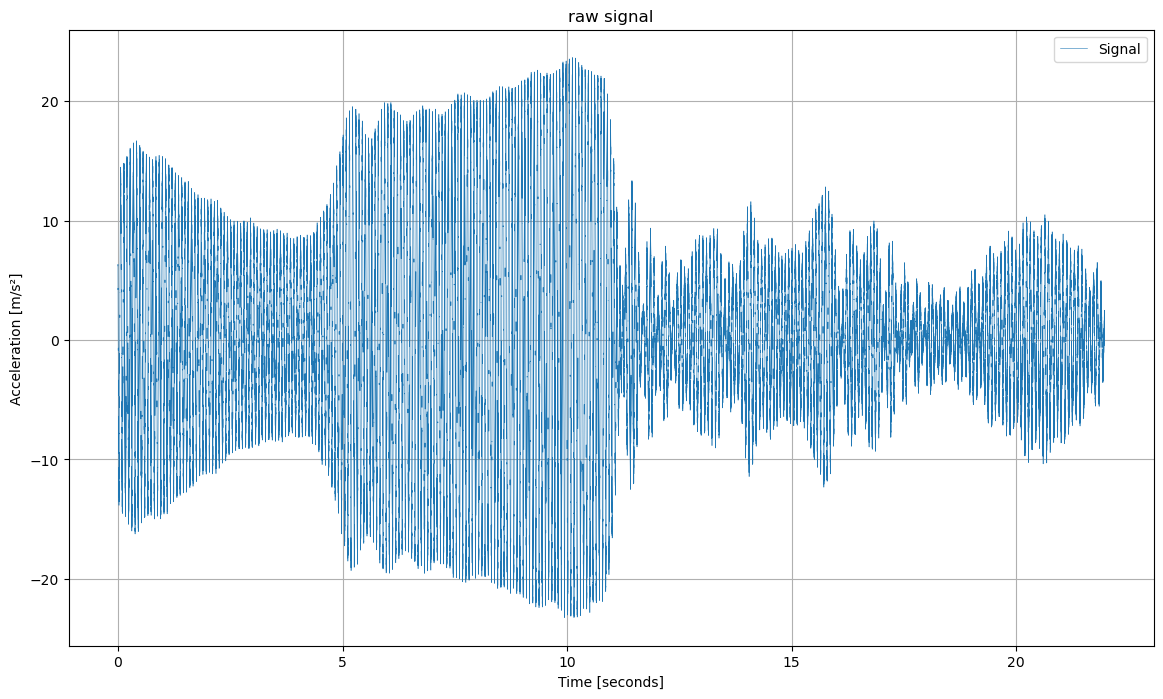

In [60]:
#figura 1: sinal cru

fig, axs = plt.subplots( figsize=(14,8) ,sharex=True)

axs.plot(lista_sample, lista_data, lw=0.4, label='Signal')
axs.set_title('raw signal')
axs.set_xlabel('Time [seconds]')
axs.set_ylabel('Acceleration [m/s²]')
plt.legend(ncol=1)

plt.grid(True)
plt.show()

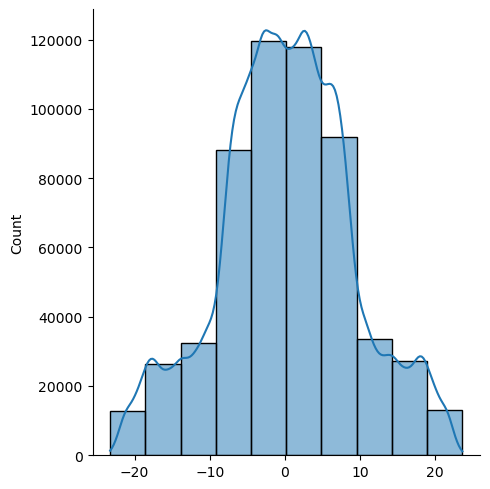

In [64]:
sns.displot(lista_data, bins=10,kde=True)

In [8]:
# Janelas temporais 

window_1s = int(1/Delta)
window_5s = int(5/Delta)
window_15s = int(15/Delta)

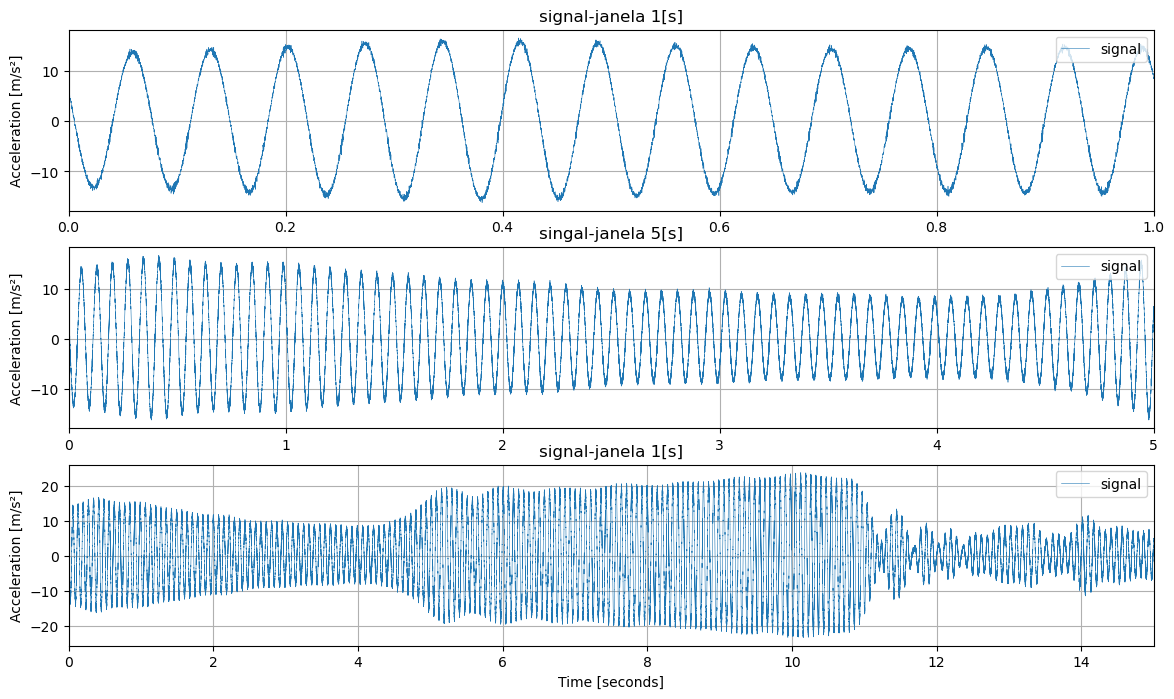

In [9]:
#figura 1: sinal cru

fig, ax = plt.subplots(3,1, figsize=(14,8), )

ax[0].plot(lista_sample[:window_1s], lista_data[:window_1s], lw=0.4, label="signal")
ax[0].set_title('signal-janela 1[s]')
#ax[0].set_xlabel('Time [seconds]')
ax[0].set_ylabel('Acceleration [m/s²]')
ax[0].set_xlim(0.0, 1)
ax[0].grid(True)
ax[0].legend(loc=1)

ax[1].plot(lista_sample[:window_5s], lista_data[:window_5s], lw=0.4, label="signal")
ax[1].set_title('singal-janela 5[s]')
#ax[1].set_xlabel('Time [seconds]')
ax[1].set_ylabel('Acceleration [m/s²]')
ax[1].set_xlim(0.0, 5)
ax[1].grid(True)
ax[1].legend(loc=1)

ax[2].plot(lista_sample[:window_15s], lista_data[:window_15s], lw=0.4, label="signal")
ax[2].set_title('signal-janela 1[s]')
ax[2].set_xlabel('Time [seconds]')
ax[2].set_ylabel('Acceleration [m/s²]')
ax[2].set_xlim(0.0, 15)
ax[2].grid(True)
ax[2].legend(loc=1)

plt.grid(True)
plt.show()

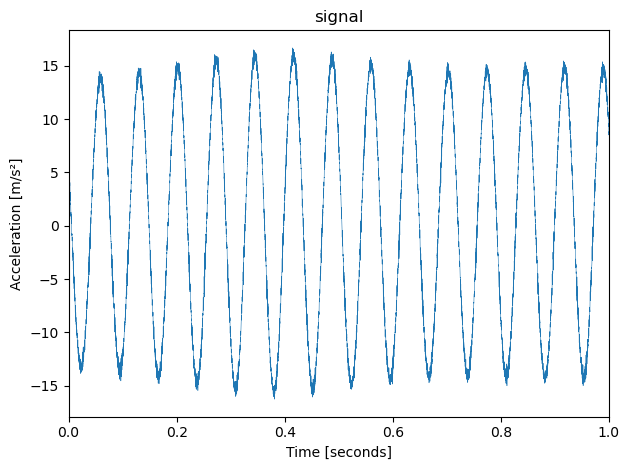

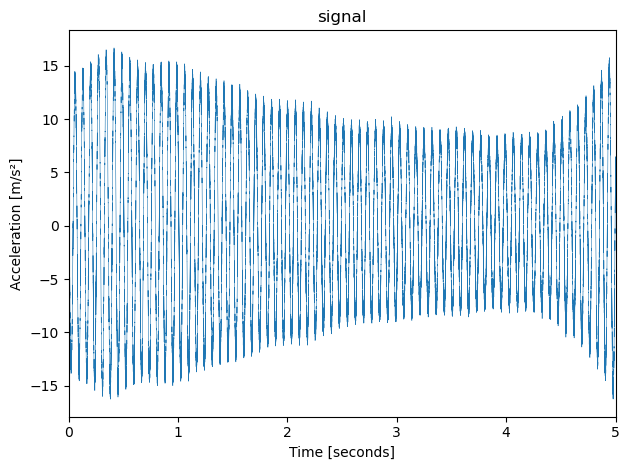

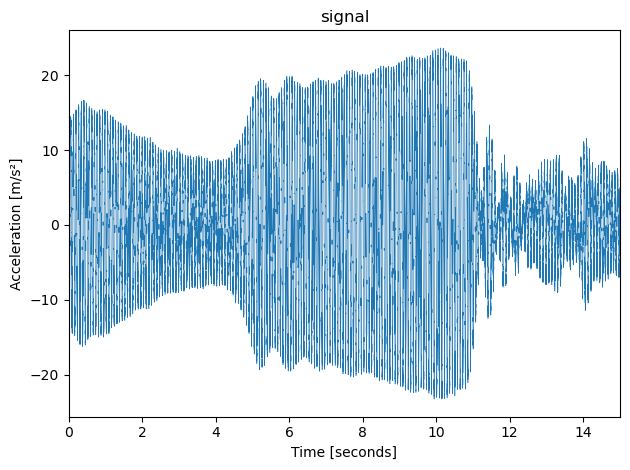

In [10]:
#figura 1: sinal cru

fig, axs = plt.subplots( sharex=True)

axs.plot(lista_sample[:window_1s], lista_data[:window_1s], lw=0.4)
axs.set_title('signal')
axs.set_xlabel('Time [seconds]')
axs.set_ylabel('Acceleration [m/s²]')
axs.set_xlim(0.0, 1)
plt.tight_layout()
fig, axs = plt.subplots( sharex=True)

axs.plot(lista_sample[:window_5s], lista_data[:window_5s], lw=0.4)
axs.set_title('signal')
axs.set_xlabel('Time [seconds]')
axs.set_ylabel('Acceleration [m/s²]')
axs.set_xlim(0.0, 5)
plt.tight_layout()

fig, axs = plt.subplots( sharex=True)

axs.plot(lista_sample[:window_15s], lista_data[:window_15s], lw=0.4)
axs.set_title('signal')
axs.set_xlabel('Time [seconds]')
axs.set_ylabel('Acceleration [m/s²]')
axs.set_xlim(0.0, 15)
plt.tight_layout()

In [11]:
# RMS = 1/n*(s_1**-s_2**)

rms_sample = []

for i in range(len(lista_data)-2000):
    rms = 0
    
    for w in range(i, i + 2000 ):
        rms= rms + (lista_data[w]**2) 
    
    rms_sample.append((rms/2001)**0.5)



In [12]:
# Média
med_sample = []

for i in range(len(lista_data)-2000):
    med = 0
    
    for w in range(i, i + 2000 ):
        med= med + (lista_data[w]) 
    
    med_sample.append(med/2001)

In [33]:
#Assimetria = ((1/T)*(s_1-s_2)**3)**(1/3) ... T é o periodo

sk_sample = []

media = np.mean(lista_data)

for i in range(len(lista_data)-2000):
    
    sk = 0
        
    for w in range(i, i + 2000 ):
        sk= sk + (lista_data[w]**3)
    
    sk_sample.append((sk/2001)**(1/3))


In [20]:
# Desvio padrão = ((sample-media)**2/len(sample))**(0.5) ... T é o periodo

dv_sample = statistics.stdev(lista_data)

#media = sum(lista_data)/len(lista_data)

#for i in range(len(lista_data)-2000):
    #dv = 0
    
    #for w in range(i, i + 2000 ):
        #media = sum(lista_data[w])/len(lista_data[w])
        #dv= (dv - ( np.mean(lista_data[i:i + 2000])))**2 
    
    #dv_sample.append((dv/2001)**0.5)

In [22]:
# curtose = (1/(dv**4 * T)*(s_1**4+s_2**4)) ... T é o periodo

k_sample = []

for i in range(len(lista_data)-2000):
    k = 0
    
    for w in range(i, i + 2000 ):
        k= k + (lista_data[w]**4) 
    
    k_sample.append(k/(2001*(dv_sample)**4))



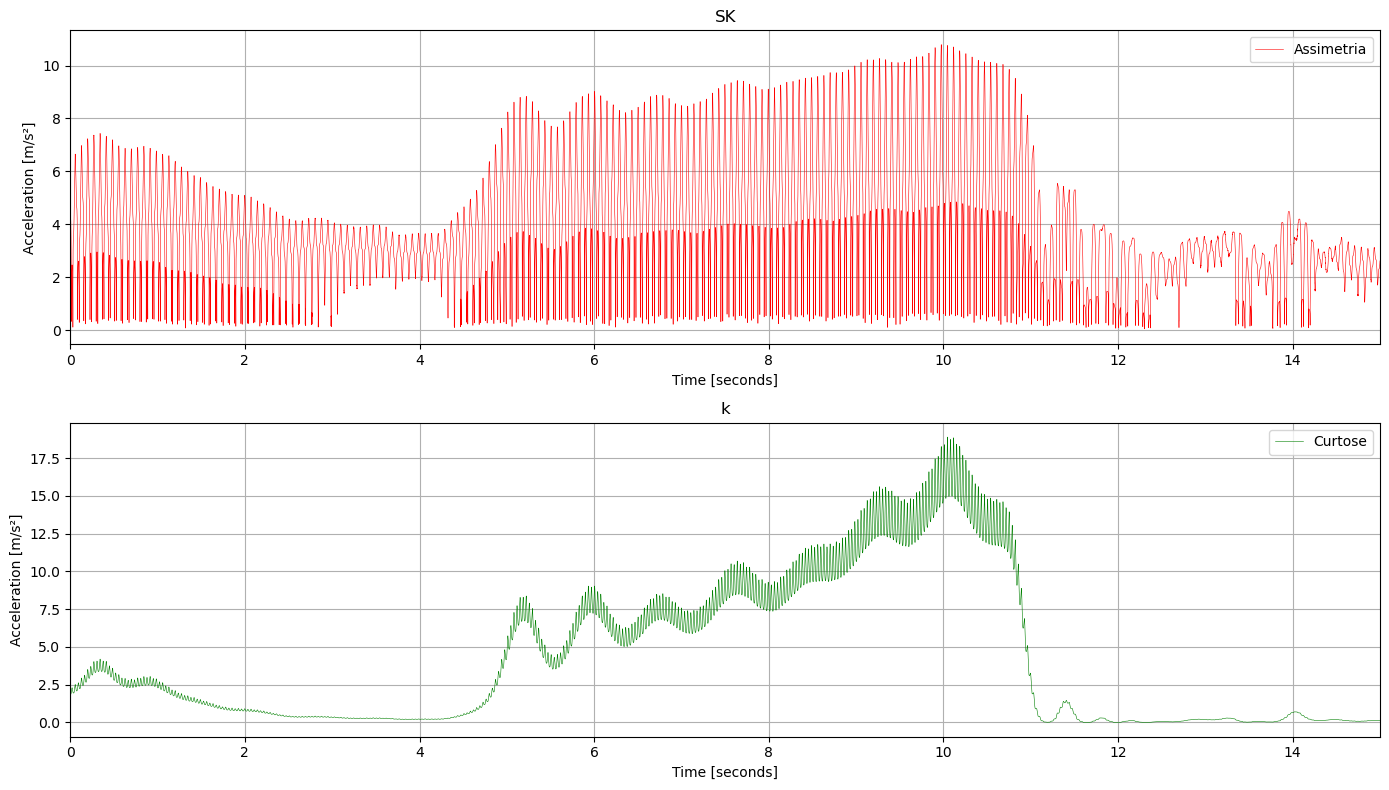

In [38]:
#figura 1: sinal cru

fig, ax = plt.subplots(2,1, figsize=(14,8), )

ax[0].plot(lista_sample[:-2000], sk_sample, "r", lw=0.4, label='Assimetria')
ax[0].set_title('SK')
ax[0].set_xlabel('Time [seconds]')
ax[0].set_ylabel('Acceleration [m/s²]')
ax[0].set_xlim(0.0, 15)
ax[0].grid(True)
ax[0].legend(loc=1)

ax[1].plot(lista_sample[:-2000], k_sample, "g", lw=0.4, label="Curtose")
ax[1].set_title('k')
ax[1].set_xlabel('Time [seconds]')
ax[1].set_ylabel('Acceleration [m/s²]')
ax[1].set_xlim(0.0, 15)
ax[1].grid(True)
ax[1].legend(loc=1)



plt.tight_layout()

plt.grid(True)
plt.show()

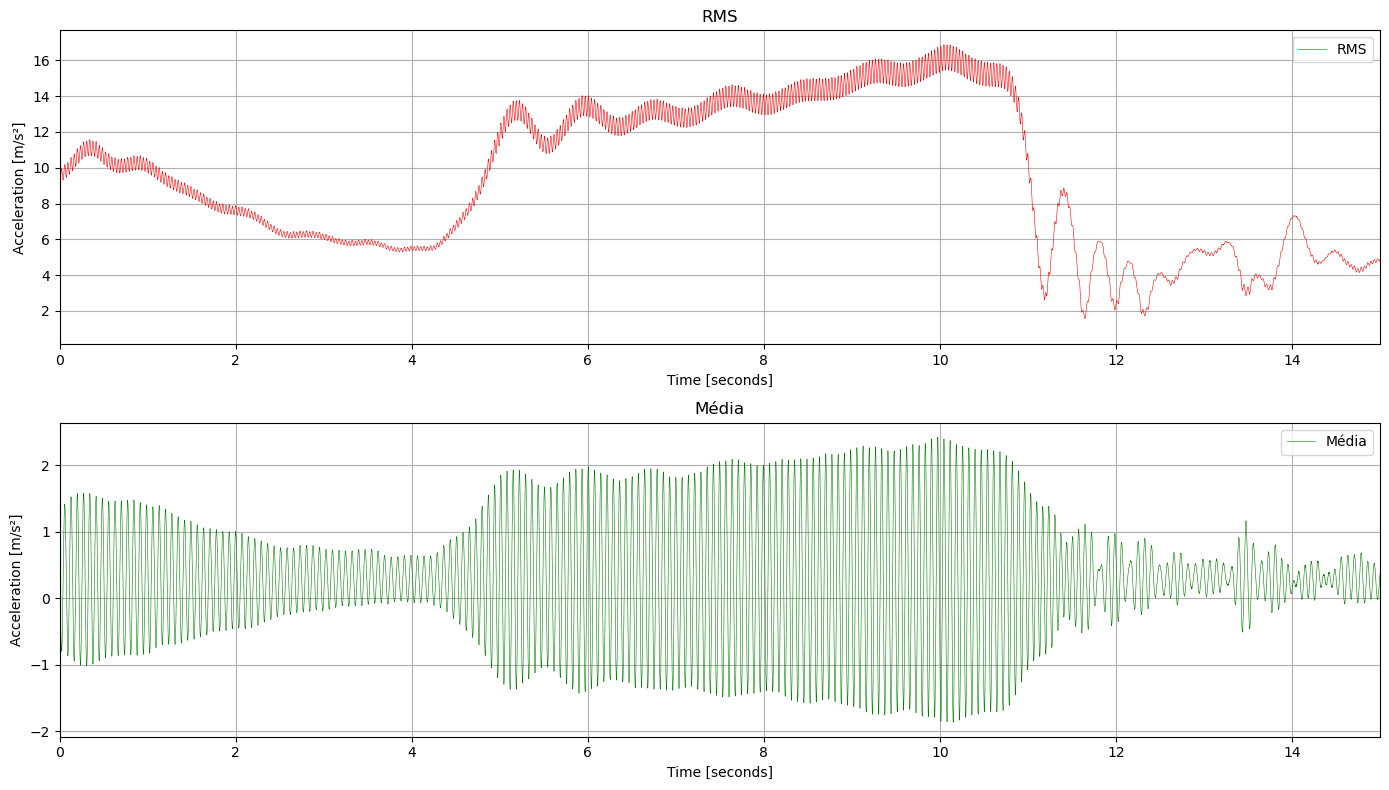

In [ ]:
#figura 1: sinal cru

fig, ax = plt.subplots(2,1, figsize=(14,8), )

ax[0].plot(lista_sample[:-2000], rms_sample, "r", lw=0.4, label='RMS')
ax[0].set_title('RMS')
ax[0].set_xlabel('Time [seconds]')
ax[0].set_ylabel('Acceleration [m/s²]')
ax[0].set_xlim(0.0, 15)
ax[0].grid(True)
ax[0].legend(loc=1)

ax[1].plot(lista_sample[:-2000], med_sample, "g", lw=0.4, label="Média")
ax[1].set_title('Média')
ax[1].set_xlabel('Time [seconds]')
ax[1].set_ylabel('Acceleration [m/s²]')
ax[1].set_xlim(0.0, 15)
ax[1].grid(True)
ax[1].legend(loc=1)



plt.tight_layout()

plt.grid(True)
plt.show()

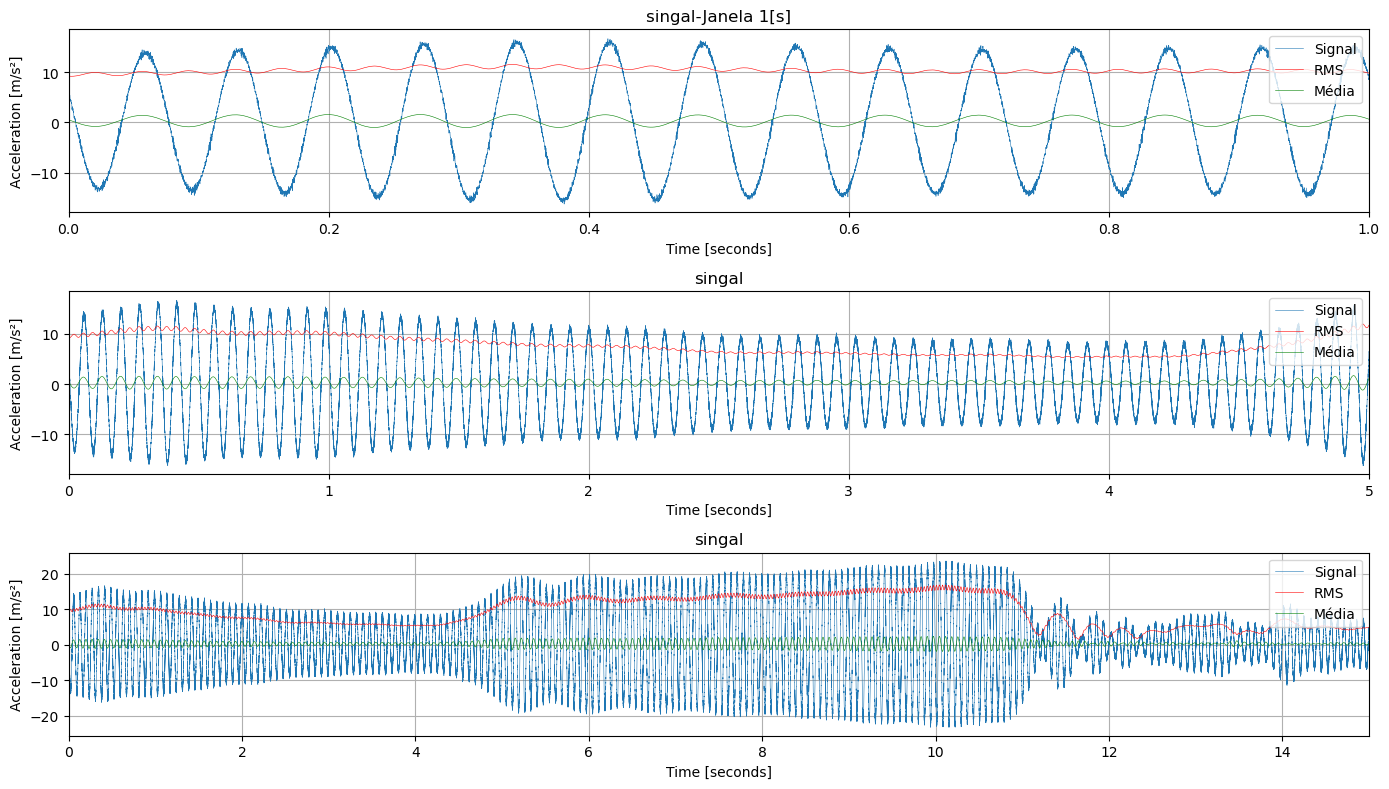

In [ ]:
#figura 1: sinal cru

fig, ax = plt.subplots(3,1, figsize=(14,8), )

ax[0].plot(lista_sample[:window_1s], lista_data[:window_1s], lw=0.4, label="Signal")
ax[0].plot(lista_sample[:-2000], rms_sample, "r", lw=0.4, label="RMS")
ax[0].plot(lista_sample[:-2000], med_sample, "g", lw=0.4, label="Média")
ax[0].set_title('singal-Janela 1[s]')
ax[0].set_xlabel('Time [seconds]')
ax[0].set_ylabel('Acceleration [m/s²]')
ax[0].set_xlim(0.0, 1)
ax[0].grid(True)
ax[0].legend(loc=1)

ax[1].plot(lista_sample[:window_5s], lista_data[:window_5s], lw=0.4, label="Signal")
ax[1].plot(lista_sample[:-2000], rms_sample, "r", lw=0.4,label="RMS")
ax[1].plot(lista_sample[:-2000], med_sample, "g", lw=0.4, label="Média")
ax[1].set_title('singal')
ax[1].set_xlabel('Time [seconds]')
ax[1].set_ylabel('Acceleration [m/s²]')
ax[1].set_xlim(0.0, 5)
ax[1].grid(True)
ax[1].legend(loc=1)

ax[2].plot(lista_sample[:window_15s], lista_data[:window_15s], lw=0.4, label="Signal")
ax[2].plot(lista_sample[:-2000], rms_sample, "r", lw=0.4,label="RMS")
ax[2].plot(lista_sample[:-2000], med_sample, "g", lw=0.4, label="Média")
ax[2].set_title('singal')
ax[2].set_xlabel('Time [seconds]')
ax[2].set_ylabel('Acceleration [m/s²]')
ax[2].set_xlim(0.0, 15)
ax[2].grid(True)
ax[2].legend(loc=1)


plt.tight_layout()

plt.grid(True)
plt.show()

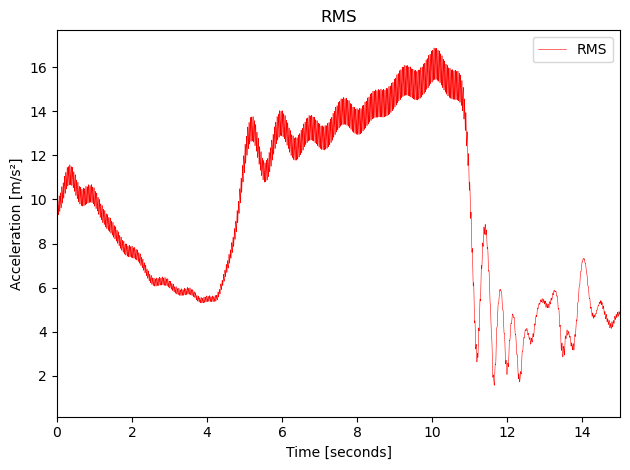

In [ ]:
#figura 1: sinal cru

fig, axs = plt.subplots( sharex=True)

axs.plot(lista_sample[:-2000], rms_sample, "r", lw=0.4, label="RMS")
axs.set_title('RMS')
axs.set_xlabel('Time [seconds]')
axs.set_ylabel('Acceleration [m/s²]')
axs.set_xlim(0.0, 15)
axs.legend(loc=1)
plt.tight_layout()


In [ ]:
#dB = 100 + 20 log10(a)
#Hz = 1 / s

Questão 01) Discorra sobre a importância dos recursos e procedimentos administrativos na implantação eficiente de um sistema de manutenção, e quais implicações daí decorrentes para a implantação de manutenção preditiva. Comente a situação atual da MB neste aspecto.
A utilização de recursos e procedimentos administrativos na implementação eficaz de um sistema de manutenção é crucial para preservar um registro histórico relacionado à manutenção. Através desses registros, torna-se viável realizar uma avaliação das tendências que os equipamentos e os sistemas estejam demonstrando. É relevante salientar que esses registros devem ter o maior nível de detalhe possível, com o propósito de oferecer uma ampla variedade de dados necessários para conduzir a análise.
De posse de um sistema eficiente, seria possível efetuar a manutenção preditiva dos equipamentos utilizando tecnologias de monitoramento e análise de dados, criando modelos e uma base de dados forte. Com eles, as análises poderão ser conduzidas e o acompanhamento dos parâmetros realizado. Assim, pode-se determinar o momento exato das intervenções e identificar sinais precoces de desgaste e em equipamentos e sistemas, economizando recursos e aumentando a disponibilidade dos meios. 
Atualmente, a Marinha não buscar implementar um sistema com manutenção preditiva de seus meios. No geral, os navios possuem um sistema de acompanhamento de manutenções planejadas o que configura manutenção preventiva. Um exemplo disso é o Sistema COSWIN do Navio Patrulha Oceânico Amazonas que gera rotinas de manutenção mensais a partir das horas de funcionamento dos equipamentos e dos seus respectivos manuais. A tentativa de montar um banco de dados confiável ocorre por parte da própria tripulação através de livros históricos, porém esse modelo não se mostra tão eficiente quando observamos um excesso de manutenções corretivas.

Questão 02) Discorra sobre as vantagens e desvantagens dos modelos de manutenção corretiva, preventiva e preditiva. Exemplifique no âmbito da MB.
	
Os modelos de manutenção corretiva, preventiva e preditiva são abordagens diferentes para o gerenciamento da manutenção de equipamentos e sistemas. Cada um deles possui vantagens e desvantagens, e a escolha do modelo mais adequado depende das necessidades e das características específicas de cada organização. 
A manutenção corretiva é simples de implementar, uma vez que envolve a reparação somente quando uma falha ocorre. Ela deve ser apropriadamente implementada em equipamentos de baixo valor ou não essenciais, onde a paralisação não é crítica. Isso se deve ao fato que ela resulta em tempo de inatividade não planejado, o que pode afetar a produtividade e a eficiência gerando custos indiretos significativos, como perda de produção, reparos emergenciais caros e possíveis danos a outros equipamentos.
Exemplo da lancha
A manutenção preventiva ajuda a reduzir a probabilidade de falhas ao realizar inspeções regulares e substituição de componentes desgastados prolongando a vida útil dos equipamentos, pois os mantém em boas condições de funcionamento. Porém devem ser planejadas com antecedência, minimizando o tempo de inatividade não planejado.
Esse tipo de manutenção pode ser cara, especialmente se envolver a substituição frequente de peças e componentes, mesmo que eles ainda estejam funcionando. Isso resulta em substituições prematuras de peças que ainda estão em boas condições de funcionamento, o que pode ser dispendioso.
Exemplo do coswin e troca de filtros
A manutenção preditiva permite uma alocação eficiente de recursos, pois as intervenções são realizadas apenas quando necessário através de um sistema de manutenção que possibilite prever falhas e consequentemente minimizando o tempo de inatividade não planejado. Consequentemente, equipamentos monitorados de forma preditiva tendem a ser mais confiáveis, uma vez que as falhas são detectadas precocemente.
A principal desvantagem desse modelo é o custo inicial da implementação da tecnologia de monitoramento envolvida e no treinamento da equipe. Isso acontece, pois a manutenção preditiva exige um sistema de monitoramento e análise de dados sofisticado e equipes qualificadas para interpretar os resultados. Além disso, os sistemas preditivos podem às vezes gerar alertas falsos de falha, levando a intervenções desnecessárias.
Exemplo da papeleta de serviço e bomba de água salgada do ar condicionado
Em resumo, a escolha entre os modelos de manutenção corretiva, preventiva e preditiva depende da natureza dos equipamentos, dos custos envolvidos e dos objetivos da organização. Em muitos casos, uma abordagem de manutenção mista que combina elementos dos três modelos pode ser a mais eficaz para garantir a confiabilidade operacional e reduzir os custos de manutenção.
Questão 03) Explique a utilidade ou necessidade de um “modelo de falha” para a boa implementação de um sistema de manutenção preditiva. O que seria necessário considerar neste modelo?

A análise do "modelo de falha" parte da premissa de que certos modos de falha são comuns a todas as aplicações e máquinas e que os padrões de vibração associados a esses modos são identificáveis. No entanto, embora essa análise possa detectar problemas e seus sintomas, nem sempre consegue identificar a causa raiz. Para realizar essa análise, são necessárias informações de assinaturas de vibração, tanto em FFT quanto no tempo, juntamente com um conhecimento prático da dinâmica da máquina e modelos de falha.
O modelo de falha é fundamental para a boa implementação de um sistema de manutenção preditiva, pois serve como a base para a identificação, interpretação e previsão de falhas. Ele ajuda a identificar os pontos de monitoramento críticos em um equipamento ou sistema. Isso significa que é possível determinar quais componentes ou parâmetros específicos devem ser monitorados para detectar potenciais falhas.

Questão 04) Discorra sobre a adoção de uma métrica para a determinação da “eficiência” do sistema de manutenção dos navios na armada. Explique como você calcularia esta métrica e qual seria o valor dela a ser utilizado como meta.
	A definição de métricas e seu acompanhamento são altamente cruciais para operar sistemas, equipamentos e/ou recursos de forma mais eficaz e precisa. Elas estabelecem indicadores que avaliam o desempenho do sistema em relação às necessidades da organização. A partir desses indicadores, ações de aprimoramento e implementação de estratégias podem ser adotadas, visando melhorar o desempenho em relação aos desafios enfrentados. Dessa forma, em cenários onde houve falta de atendimento e disponibilidade insuficiente, esforços podem ser dedicados para impulsionar o crescimento e o desenvolvimento, transformando a abordagem em relação aos problemas e tornando todo o sistema de manutenção mais eficaz.
	Uma boa métrica seria a disponibilidade anual de seus equipamentos e sistemas, ou seja, quantos dias em relação ao total do ano o sistema, equipamento e/ou meio estavam disponíveis para utilização. Para o cálculo dessa métrica, procedemos de maneira similar à anterior: os equipamentos teria um “peso” particular de acordo com sua criticidade para a execução da missão do navio e seria feito um levantamento diário da capacidade, ou não, dele operar de forma satisfatória. Para o cálculo da disponibilidade anual, temos conforme a fórmula abaixo, onde temos, novamente, uma média ponderada de acordo com a criticidade dos equipamentos. Quanto maior for o seu valor, melhor é a disponibilidade do meio e possibilidade de atender às demandas da MB. Quanto menor ele for, ações devem ser buscadas para melhorar esta métrica e tornar o sistema, equipamento e/ou meio mais disponível para as necessidades da MB.
 

Questão 05) Dê sua visão sobre a frase "Manutenção preventiva deveria se chamar manutenção predatória!" Você acha possível implementar um sistema de manutenção puramente preditiva?

A frase "Manutenção preventiva deveria se chamar manutenção predatória!" reflete uma perspectiva crítica sobre a manutenção preventiva, sugerindo que, em algumas situações, as práticas preventivas podem ser excessivamente agressivas ou dispendiosas, levando a substituições prematuras de componentes ou ações de manutenção desnecessárias. Embora essa visão possa ser válida em alguns casos, é importante destacar que a manutenção preventiva desempenha um papel crucial na manutenção de equipamentos e sistemas, ajudando a evitar falhas inesperadas e prolongar a vida útil dos ativos.
Quanto à possibilidade de implementar um sistema de manutenção puramente preditiva, isso pode ser viável em algumas situações, mas é importante reconhecer que nem sempre é prático ou eficaz em todos os cenários. Aqui estão alguns pontos a considerar:
•	Tecnologia e Recursos: A implementação da manutenção preditiva depende da disponibilidade de tecnologia de monitoramento avançada, como sensores, sistemas de análise de dados e pessoal treinado para operar e interpretar os dados. Em alguns casos, essa tecnologia pode não estar disponível ou pode ser muito cara para ser implementada em todos os equipamentos.
•	Variedade de Ativos: Em organizações com uma ampla variedade de ativos, alguns podem ser mais adequados à manutenção preditiva do que outros. Equipamentos mais antigos ou menos complexos podem não se beneficiar tanto dessa abordagem.
•	Complexidade da Operação: Em ambientes de produção altamente complexos, a manutenção preditiva pode ser mais desafiadora de implementar devido à interconexão de sistemas e à dificuldade de isolar problemas específicos.
•	Custos vs. Benefícios: A implementação de um sistema de manutenção puramente preditiva pode não ser economicamente justificável em todos os casos. É necessário avaliar cuidadosamente os custos envolvidos em comparação com os benefícios esperados, considerando fatores como a criticidade dos ativos, o impacto da falha e os recursos disponíveis.
•	Estratégia Mista: Em muitos casos, uma abordagem de manutenção mista, que combina elementos da manutenção preventiva, preditiva e corretiva, pode ser a mais eficaz. Isso permite uma alocação de recursos mais equilibrada, com a manutenção preditiva sendo aplicada onde é mais benéfica.
Portanto, enquanto a manutenção preditiva é uma abordagem valiosa para a gestão de ativos, sua implementação deve ser cuidadosamente planejada e adaptada às necessidades e características específicas de cada organização e de seus ativos. Não é necessariamente viável ou adequado para todas as situações, e uma abordagem equilibrada pode ser a chave para uma gestão eficiente da manutenção.

Questão 06) Discorra sobre a variação dos custos de manutenção de um equipamento em relação aos esforços de manutenção preventiva e preditiva.
	A manutenção preditiva apresenta custos iniciais de instalação de sistemas de medição e monitoramento, além de treinamento do pessoal para rotina de monitoramento em relação à manutenção preventiva. Por outro lado, a manutenção preventiva incorre em maiores paradas (mais interrupções na produção), substituição de componentes em menores intervalos, podendo os componentes ainda estarem em condições próprias de funcionamento, consumo maior de materiais, etc. em relação à manutenção preditiva.

Questão 07) Esboce um plano sucinto de manutenção para um MCP explicitando os aspectos corretivos, preventivos e preditivos.
	Corretiva: troca de bico injetor avariado, troca de bomba avariada, troca de válvula de admissão ou descarga, etc. Engloba toda e qualquer ação de troca de um equipamento quando o mesmo se encontra avariado e não mais executa suas funções de maneira apropriada.
	Preventiva: troca periódica dos filtros de lubrificante e combustível, adição periódica de aditivo na água de resfriamento, limpeza periódica de bicos injetores, etc. Engloba toda e qualquer ação periódica a ser executada nos equipamentos, a fim de prolongar a vida útil do MCP. Não se preocupa no fato de o elemento ainda se encontrar em condições de uso ou não.
	Preditiva: acompanhamento das propriedades da água de resfriamento para estabelecer correto momento da colocação de aditivos, acompanhamento da pressão nas redes que alimentam o motor para verificação dos parâmetros e determinação do momento certo de intervenção, análise de vibração do motor, análise do lubrificante quanto a suas propriedades, acompanhamento da temperatura dos gases, da água, do óleo como parâmetros para determinação do momento exato de intervenção, etc. Engloba toda e qualquer ação de acompanhamento sistemático de parâmetros, análise estatística e definição de métricas para determinar o melhor momento de intervenção em um dado elemento, a fim de prolongar sua vida útil e evitar paradas desnecessárias.

Questão 08) Discorra sobre a variação dos custos de manutenção de um equipamento ao longo de sua vida útil.
	
Os custos de manutenção de um equipamento podem variar significativamente ao longo de sua vida útil, passando por diferentes fases. É essencial compreender essas variações para uma gestão eficaz dos ativos e uma tomada de decisão informada. Aqui estão as principais fases de variação dos custos de manutenção:
Fase Inicial (Período de Garantia): No início da vida útil de um equipamento, geralmente há poucos custos de manutenção, especialmente se o equipamento estiver coberto por um período de garantia. As despesas são limitadas a manutenções preventivas programadas, como verificações de rotina e substituições de componentes de desgaste natural.
Fase de Crescimento Lento: Conforme o equipamento envelhece, os custos de manutenção tendem a permanecer relativamente baixos, mas começam a crescer lentamente à medida que os primeiros sinais de desgaste ou falhas se tornam visíveis. A manutenção preventiva continua a ser a principal atividade.
Fase de Aumento de Custos: À medida que o equipamento envelhece ainda mais, os custos de manutenção começam a aumentar de forma mais significativa. Os componentes começam a se deteriorar, exigindo substituições mais frequentes e reparos mais complexos. A manutenção corretiva também pode aumentar à medida que as falhas se tornam mais comuns.
Fase de Estabilidade ou Plateau: Em algum momento, os custos de manutenção podem atingir um platô, onde permanecem relativamente estáveis por um período. Isso geralmente ocorre após uma revisão abrangente do equipamento, onde os componentes críticos são substituídos e atualizados. Nesse estágio, a manutenção preventiva ainda é importante, mas o foco também pode incluir a manutenção preditiva para prever falhas.
Fase de Declínio: À medida que o equipamento envelhece significativamente, os custos de manutenção podem começar a aumentar novamente. A deterioração contínua e o desgaste geral podem levar a falhas mais frequentes e a uma necessidade crescente de intervenções de manutenção corretiva.
Fase de Substituição ou Descontinuação: Eventualmente, os custos de manutenção podem se tornar tão elevados que a substituição do equipamento se torna a opção mais econômica. Nessa fase, os custos de manutenção cessam, mas os custos de aquisição e implementação de um novo equipamento entram em jogo.
É importante observar que o timing e a magnitude dessas variações podem variar amplamente, dependendo do tipo de equipamento, das condições de operação, da qualidade da manutenção realizada e de outros fatores. Portanto, a gestão de ativos deve envolver uma análise contínua dos custos ao longo do ciclo de vida de um equipamento, com o objetivo de tomar decisões informadas sobre manutenção, reparo, substituição ou atualização. Isso contribuirá para a otimização dos custos e a maximização da confiabilidade e da eficiência operacional.

 
Questão 09) Qual instrumentação (tipos de sensores) e análises você especificaria para a manutenção preditiva de um MCP e porquê?
	Resposta:
	Acelerômetros, a fim de medir vibrações em pontos chaves no motor (eixos principalmente). Desta forma, pode-se prever quando um motor esteja funcionando de maneira desregulada, proporcionando maiores vibrações que os padrões encontrados normalmente.
	Sensores de temperatura, a fim de avaliar a eficiência da combustão, bem como a eficiência do resfriamento. Com o acompanhamento das temperaturas, pode-se inferir características termodinâmicas que estejam ocorrendo no equipamento e, assim, avaliar quão bem ele está executando seu papel.
	Sensores de pressão, a fim de determinar se o equipamento está sendo “alimentado” com valores adequados em cada uma de suas redes. Com isso, pode-se avaliar os momento exatos para uma intervenção de limpeza de filtros, de inspeção de rede ou das bombas para que o equipamento funcione de maneira satisfatória.
	Sensores de rotação, a fim de avaliar se as bombas estão desempenhando seu papel de maneira satisfatória, proporcionando a rotação adequada para que o MCP funcione adequadamente.
	Sensores de propriedades químicas dos fluidos empregados na operação do motor, como alcalinidade, salinidade, cor, etc. Com isso, pode-se avaliar os momentos exatos para uma intervenção de troca de óleo, limpeza de fluidos, colocação de aditivos, etc.
Questão 10) Quais as razões devem ser levadas em conta para a tomada de decisão de implementação de um sistema de manutenção corretiva, preventiva ou preditiva.
	Resposta:
	Custo, nível de criticidade do equipamento, disponibilidade desejada, produtividade desejada, qualidade da operação do equipamento e combinação de todos estes fatores.
    
Questão 11) Discorra sobre a importância de se conhecer os processos mecânicos ocorrendo na máquina monitorada para a confecção de um diagnóstico correto de operação.
	Resposta:
O conhecimento detalhado dos processos mecânicos em uma máquina ou sistema é essencial para a realização de diagnósticos precisos e eficazes de operação. Isso não apenas ajuda a evitar falhas catastróficas, mas também contribui para a melhoria da eficiência operacional, redução de custos e aumento da confiabilidade dos equipamentos. Portanto, é uma parte fundamental da manutenção preditiva e de uma estratégia de gerenciamento de ativos eficiente.


